 # News Articles Analysis 

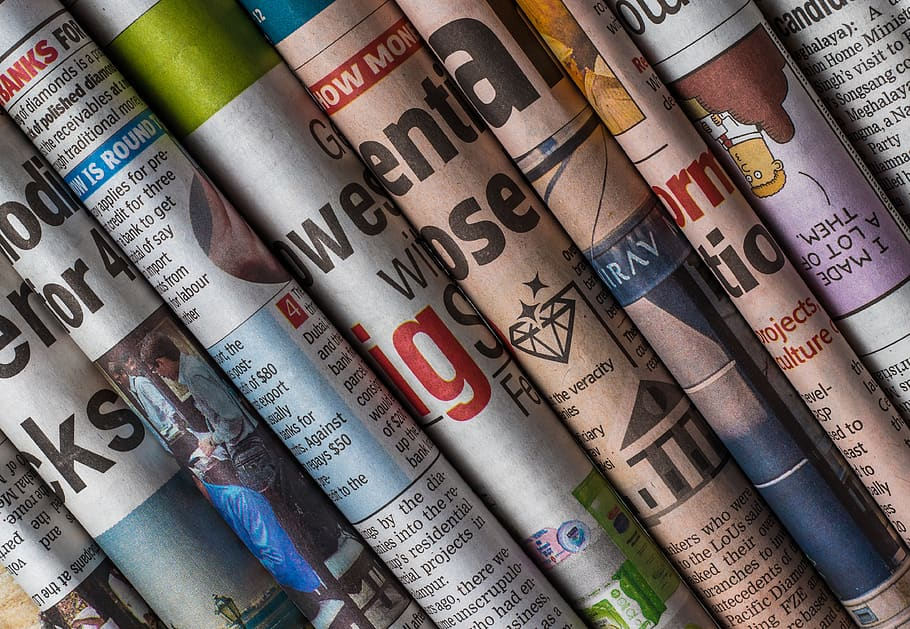

<a id="cont"></a>

### <span style="color:#0077be"><b> Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
    * [1.2 Objectives](#section_1_2)
    * [1.3 Importing Packages](#section_1_3)
    * [1.4 Loading Data](#section_1_4)
* <b>[2. Data Cleaning](#chapter2)
    * [2.1 Train Data Cleaning](#section_2_1)
        * [2.1.1 Removing stopwords](#subsection_2_1_1)
        * [2.1.2 Removing punctuation](#subsection_2_1_2)
        * [2.1.3 Removing noise](#subsection_2_1_3)
        * [2.1.4 Tokenization](#subsection_2_1_4)
        * [2.1.5 Stemming](#subsection_2_1_5)
        * [2.1.6 Lemmatization](#subsection_2_1_6)
        * [2.1.7 Removing emojis](#subsection_2_1_7)
        * [2.1.8 Finding frequent words](#subsection_2_1_8)
    * [2.2 Test Data Cleaning](#section_2_2)
        * [2.2.1 Removing stopowrds](#subsection_2_2_1)
        * [2.2.2 Removing noise](#subsection_2_2_2)
        * [2.2.3 Removing punctuation](#subsection_2_2_3)
        * [2.2.4 Removing emojis](#subsection_2_2_4)
        * [2.2.5 Tokenization](#subsection_2_2_5)
        * [2.2.6 Stemming](#subsection_2_2_6)
        * [2.2.7 Lemmatization](#subsection_2_2_7)
        * [2.2.8 Finding frequent words](#subsection_2_2_8)   
* <b>[3. Exploratory Data Analysis (EDA)](#chapter3)
* <b>[4. Data Preproccessing](#chapter4)
* <b>[5. Model Tuning](#chapter5)
* <b>[6. Conclusion](#chapter6)</b>
* <b>[7. References](#chapter7)

## <span style="color:#0077be"><b> 1. Project Overview 

<a id="section_1_1"></a>
## 1.1. Introduction 
>Our group has been tasked with this project to create classification models using Python and deploy it as a web application with Streamlit. 
The aim is to provide you with a hands-on demonstration of applying machine learning techniques to natural language processing tasks.  This end-to-end project encompasses the entire workflow, including data loading, preprocessing, model training, evaluation, and final deployment. The primary stakeholders for the news classification project for the news outlet could include the editorial team, IT/tech support, management, readers, etc. These groups are interested in improved content categorization, operational efficiency, and enhanced user experience.

## 1.2. Objectives <a class="anchor" id="section_1_2"></a>
>Streamlined Workflow: Create an end-to-end machine learning workflow that includes data loading, preprocessing, model training, evaluation, and deployment to streamline the process for data scientists and engineers.

>Accurate Classification: Develop and deploy machine learning models that accurately classify news articles into predefined categories to assist the editorial team in better organizing and managing content.

>Hands-On Learning: Provide a comprehensive, hands-on demonstration of applying natural language processing (NLP) and machine learning techniques to real-world data, facilitating learning and skill development for the team.

>Significantly enhance the efficiency and effectiveness of the news outlet's content management and delivery, benefiting all primary stakeholders involved.

## 1.3. Importing Packages <a class="anchor" id="chapter2"></a>
#### We import necessary packages for data manipulation and analysis
+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [1]:
# Importing packages for data manipulation and analysis
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
# import contractions
# from langdetect import detect
#from textblob import TextBlob
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

### Downloading NLTK corpora
>NLTK – Natural Language Toolkit – is a widely used library for building Python programs to work with human language data. It provides interfaces to numerous corpora and lexical resources, such as WordNet, along with a suite of text-processing libraries for classification, tokenisation, stemming, tagging, parsing, and semantic reasoning.

In [2]:
# Necessary Libraries
import nltk

## 1.4. Loading Data <a class="anchor" id="chapter3"></a>
>We load our respectice datasets; the *'train_data'* and *'test_data'* csv files to Pandas dataframes 

In [3]:
# loading dataset
import pandas as pd
train_df = pd.read_csv("Data\\train.csv")

test_df = pd.read_csv("Data\\test.csv")


>To prevent any major unnecessary changes occurring to the original data , a copy of the dataframe was made using the df.copy() method and referred to as df_copy for both dataframes respectively

In [4]:
# The copy of the dataframe
train_df_copy = train_df.copy()

test_df_copy = test_df.copy()

## <span style="color:#0077be"><b> 2. DATA CLEANING <a class="anchor" id="chapter4"></a>
>Clean data ensures that machine learning models are trained on accurate and relevant information, which improves their predictive performance and reliability.

## 2.1 Train Data Cleaning

In [5]:
train_df_copy.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


Check for the columns in the Dataframe and Shape

In [6]:
# Check the columns of the DataFrame
print(train_df_copy.columns)


Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [7]:
train_df_copy.shape

(5520, 5)

In [8]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


In [9]:
# Checking for duplicates
duplicates = train_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [10]:
# Check for Unique Values
unique_values = train_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      5512
description    5508
content        5513
url            5514
category          5
dtype: int64


In [11]:
# Check for Missing Values/Nulls
missing_values = train_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


### 2.1.1 Removing stop words
>Stop words are words that do not contain important significance to be used in search queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information. 

In [12]:
#We print out the stopwords for English
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biyel\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#We define a function to remove stopwords from a text
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split() 
        filtered_words = [word for word in words if word.lower() not in stopwords_list]
        return ' '.join(filtered_words)
    else:
        return text

In [14]:
# Apply the remove_stopwords function to all cells in the DataFrame
train_df_copy = train_df_copy.applymap(remove_stopwords)

In [15]:
#Showing the dataframe without stopwords
print("\nData without stopwords:")
train_df_copy.head()


Data without stopwords:


,headlines,description,content,url,category
0,RBI revises definition politically-exposed per...,central bank also asked chairpersons chief exe...,Reserve Bank India (RBI) changed definition Po...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% Rs 5.55 crore i...,NDTV's consolidated revenue operations Rs 95.5...,Broadcaster New Delhi Television Ltd Monday re...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, grow much faster...",initial share sale open public subscription Ju...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,current account deficit (CAD) 3.8 per cent GDP...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars 7.68%, highest far...",prices shot reflecting overall higher risk ave...,States forced pay nose weekly auction debt Tue...,https://indianexpress.com/article/business/eco...,business


### 2.1.2 Remove punctuation
#### We remove punctuation signs to minimise or remove noise from the dataset

#### First we make all the text lowercase to remove some noise from capitalisation.

In [16]:
# Function to convert to lowercase
train_df_copy = train_df_copy.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [17]:
#We show the dataframe without punctuation
print("\nData without punctuation:")
train_df_copy.head()



Data without punctuation:


,headlines,description,content,url,category
0,rbi revises definition politically-exposed per...,central bank also asked chairpersons chief exe...,reserve bank india (rbi) changed definition po...,https://indianexpress.com/article/business/ban...,business
1,ndtv q2 net profit falls 57.4% rs 5.55 crore i...,ndtv's consolidated revenue operations rs 95.5...,broadcaster new delhi television ltd monday re...,https://indianexpress.com/article/business/com...,business
2,"akasa air ‘well capitalised’, grow much faster...",initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,https://indianexpress.com/article/business/mar...,business
3,india’s current account deficit declines sharp...,current account deficit (cad) 3.8 per cent gdp...,india’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"states borrowing cost soars 7.68%, highest far...",prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,https://indianexpress.com/article/business/eco...,business


#### Now let's remove the punctuation using the `string` import.

In [18]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
##Defining a cleaning function
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the cell contains a string
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

In [20]:
#Apply the function to the dataframe
train_df_copy = train_df_copy.applymap(remove_punctuation)

print("\nCleaned Data without punctuation:")
train_df_copy.head()


Cleaned Data without punctuation:


,headlines,description,content,url,category
0,rbi revises definition politicallyexposed pers...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit falls 574 rs 555 crore impa...,ndtvs consolidated revenue operations rs 9555 ...,broadcaster new delhi television ltd monday re...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit declines sharp...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,states borrowing cost soars 768 highest far fi...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,httpsindianexpresscomarticlebusinesseconomysta...,business


### 2.1.3 Removing noise
>In text analytics, removing noise (i.e. unnecessary information) is a key part of getting the data into a usable format.

In [21]:
train_df_copy['url'] = 'urlweb'


In [22]:
print("\n Showing refined data:")
train_df_copy.head()


 Showing refined data:


,headlines,description,content,url,category
0,rbi revises definition politicallyexposed pers...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,urlweb,business
1,ndtv q2 net profit falls 574 rs 555 crore impa...,ndtvs consolidated revenue operations rs 9555 ...,broadcaster new delhi television ltd monday re...,urlweb,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,urlweb,business
3,india’s current account deficit declines sharp...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business
4,states borrowing cost soars 768 highest far fi...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,urlweb,business


### 2.1.4 Tokenization
>A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis.
>Text Simplification:By breaking down text into tokens, it becomes easier to manage and analyze, as each token can be individually processed and analyzed.
>Tokenization standardizes text into a consistent format, enabling more straightforward comparisons and operations across different texts.

In [23]:
import nltk
from nltk.tokenize import word_tokenize


def tokenize_text(text):
    if isinstance(text, str):
        return ' '.join(word_tokenize(text))
    return text


train_df_copy = train_df_copy.apply(tokenize_text)

print("\n Showing tokenized data:")
train_df_copy.head()



 Showing tokenized data:


,headlines,description,content,url,category
0,rbi revises definition politicallyexposed pers...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,urlweb,business
1,ndtv q2 net profit falls 574 rs 555 crore impa...,ndtvs consolidated revenue operations rs 9555 ...,broadcaster new delhi television ltd monday re...,urlweb,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,urlweb,business
3,india’s current account deficit declines sharp...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business
4,states borrowing cost soars 768 highest far fi...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,urlweb,business


### 2.1.5. Stemming
>Stemming is a rule-based process of removing suffixes and prefixes from words to reduce them to their root form, which may not be a real word. Stemming algorithms are typically heuristic-based and designed to strip affixes from words to achieve the stem.

>Simplicity: Easy to implement and understand.

In [24]:
import pandas as pd
from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer

#Stemming function
def stem_text(text):
    stemmer = PorterStemmer()
    if isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Apply stemming to the entire DataFrame
df_stemmed = train_df_copy.applymap(stem_text)

print("\n Stemmed data:")
df_stemmed.head()


 Stemmed data:


,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,urlweb,busi
1,ndtv q2 net profit fall 574 rs 555 crore impac...,ndtv consolid revenu oper rs 9555 crore rs 105...,broadcast new delhi televis ltd monday report ...,urlweb,busi
2,akasa air ‘well capitalised’ grow much faster ...,initi share sale open public subscript juli 17...,homegrown server maker netweb technolog india ...,urlweb,busi
3,india’ current account deficit declin sharpli ...,current account deficit cad 38 per cent gdp us...,india’ current account deficit declin sharpli ...,urlweb,busi
4,state borrow cost soar 768 highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,urlweb,busi


### 2.1.6 Lemmatization 
>Lemmatizing is a more sophisticated process that reduces words to their base or dictionary form, known as the lemma. It considers the context and part of speech of the word to ensure that the base form is a valid word. Lemmatization typically involves looking up a word in a dictionary and uses morphological analysis to determine the correct lemma.

>Meaning Preservation: Maintains the meaning and grammatical integrity of words.

In [25]:
from nltk.stem import WordNetLemmatizer

# Lemmatization function
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply lemmatization to the entire DataFrame
df_lemmatized = df_stemmed.applymap(lemmatize_text)

print("\nLemmatized Data:")
df_lemmatized.head()


Lemmatized Data:


,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,urlweb,busi
1,ndtv q2 net profit fall 574 r 555 crore impact...,ndtv consolid revenu oper r 9555 crore r 1058 ...,broadcast new delhi televis ltd monday report ...,urlweb,busi
2,akasa air ‘well capitalised’ grow much faster ...,initi share sale open public subscript juli 17...,homegrown server maker netweb technolog india ...,urlweb,busi
3,india’ current account deficit declin sharpli ...,current account deficit cad 38 per cent gdp us...,india’ current account deficit declin sharpli ...,urlweb,busi
4,state borrow cost soar 768 highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,urlweb,busi


### 2.1.7 Removing emojis
>Emojis are often used in text to convey emotions or sentiments but can be irrelevant or distracting for certain NLP tasks.

>Removing emojis can be a crucial step in data preprocessing to ensure that the text is clean and standardized. 

In [26]:
#We define a function to remove emojis from the strings
import re
def remove_emojis(text):
    if isinstance(text, str):  # Check if the cell contains a string
        # Define a regex pattern for emojis
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text



In [27]:
#We apply the function to the entire dataframe
df_lemmatized.applymap(remove_emojis)

print("\nCleaned Data without emojis:")
df_lemmatized.head()


Cleaned Data without emojis:


,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,urlweb,busi
1,ndtv q2 net profit fall 574 r 555 crore impact...,ndtv consolid revenu oper r 9555 crore r 1058 ...,broadcast new delhi televis ltd monday report ...,urlweb,busi
2,akasa air ‘well capitalised’ grow much faster ...,initi share sale open public subscript juli 17...,homegrown server maker netweb technolog india ...,urlweb,busi
3,india’ current account deficit declin sharpli ...,current account deficit cad 38 per cent gdp us...,india’ current account deficit declin sharpli ...,urlweb,busi
4,state borrow cost soar 768 highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,urlweb,busi


##### We will now save our cleaned and refined data as a csv file

In [28]:
# Save the DataFrame to a CSV file
df_lemmatized.to_csv('cleaned_train_data.csv', index=False)

print("DataFrame has been saved to 'cleaned_train_data.csv'.")

DataFrame has been saved to 'cleaned_train_data.csv'.


## 2.2 Test Data Cleaning 

In [29]:
test_df_copy = test_df.copy()

In [30]:
test_df_copy.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [31]:
test_df_copy.shape

(2000, 5)

In [32]:
test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [33]:
# Checking for duplicates
duplicates = test_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [34]:
# Check for Unique Values
unique_values = test_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      2000
description    2000
content        2000
url            2000
category          5
dtype: int64


In [35]:
# Check for Missing Values/Nulls
missing_values = test_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [36]:
# Check the columns of the DataFrame
print(test_df_copy.columns)

Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


### 2.2.1 Removing stopwords

In [37]:
#We print out the stopwords for English
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\biyel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
#We define a function to remove stopwords from a text
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split() 
        filtered_words = [word for word in words if word.lower() not in stopwords_list]
        return ' '.join(filtered_words)
    else:
        return text

In [39]:
#Apply function to the dataframe
test_df_copy = test_df_copy.applymap(remove_stopwords)

In [40]:
#Showing the dataframe without stopwords
print("\nData without stopwords:")
test_df_copy.head()


Data without stopwords:


,headlines,description,content,url,category
0,NLC India wins contract power supply Rajasthan...,State-owned firm NLC India Ltd (NLCIL) Monday ...,State-owned firm NLC India Ltd (NLCIL) Monday ...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: SBI Clerk prelims exam...,SBI Clerk Prelims Exam: State Bank Indian (SBI...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Ferrell, Angela ...","Barbie top nominee year, followed closely Oppe...","Michelle Yeoh, Ferrell, Angela Bassett Amanda ...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 Rs 27,999 part new price cut: H...",New deal makes OnePlus Nord 3 easy purchase Rs...,"review OnePlus Nord 3 5G, praised balanced com...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds in...,Citing review files multiple tax havens intern...,Millions dollars invested publicly traded stoc...,https://indianexpress.com/article/business/ada...,business


### 2.2.2 Removing noise

In [41]:
test_df_copy['url'] = 'urlweb'


In [42]:
print("\n Showing refined data:")
test_df_copy.head()


 Showing refined data:


,headlines,description,content,url,category
0,NLC India wins contract power supply Rajasthan...,State-owned firm NLC India Ltd (NLCIL) Monday ...,State-owned firm NLC India Ltd (NLCIL) Monday ...,urlweb,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: SBI Clerk prelims exam...,SBI Clerk Prelims Exam: State Bank Indian (SBI...,urlweb,education
2,"Golden Globes: Michelle Yeoh, Ferrell, Angela ...","Barbie top nominee year, followed closely Oppe...","Michelle Yeoh, Ferrell, Angela Bassett Amanda ...",urlweb,entertainment
3,"OnePlus Nord 3 Rs 27,999 part new price cut: H...",New deal makes OnePlus Nord 3 easy purchase Rs...,"review OnePlus Nord 3 5G, praised balanced com...",urlweb,technology
4,Adani family’s partners used ‘opaque’ funds in...,Citing review files multiple tax havens intern...,Millions dollars invested publicly traded stoc...,urlweb,business


#### We then make all the text lowercase to remove some noise from capitalisation.

In [43]:
# Function to convert to lowercase
test_df_copy = test_df_copy.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [44]:
#We show the dataframe without punctuation
print("\nData without punctuation:")
test_df_copy.head()



Data without punctuation:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,state-owned firm nlc india ltd (nlcil) monday ...,state-owned firm nlc india ltd (nlcil) monday ...,urlweb,business
1,sbi clerk prelims exams dates announced; admit...,sbi clerk prelims exam: sbi clerk prelims exam...,sbi clerk prelims exam: state bank indian (sbi...,urlweb,education
2,"golden globes: michelle yeoh, ferrell, angela ...","barbie top nominee year, followed closely oppe...","michelle yeoh, ferrell, angela bassett amanda ...",urlweb,entertainment
3,"oneplus nord 3 rs 27,999 part new price cut: h...",new deal makes oneplus nord 3 easy purchase rs...,"review oneplus nord 3 5g, praised balanced com...",urlweb,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,urlweb,business


### 2.2.3 Remove punctuation

#### We import the string import to remove punctuation

In [45]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [46]:
##Defining a cleaning function
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the cell contains a string
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

Now let's remove the punctuation using the `string` import.

In [47]:
#Apply the function to the dataframe
test_df_copy = test_df_copy.applymap(remove_punctuation)

print("\nCleaned Data without punctuation:")
test_df_copy.head()


Cleaned Data without punctuation:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,urlweb,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 rs 27999 part new price cut here’s,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,urlweb,business


### 2.2.4 Removing emojis


In [48]:
#We define a function to remove emojis from the strings
import re
def remove_emojis(text):
    if isinstance(text, str):  # Check if the cell contains a string
        # Define a regex pattern for emojis
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

In [49]:
#We apply the function to the entire dataframe
test_df_copy.applymap(remove_emojis)

print("\nCleaned Data without emojis:")
test_df_copy.head()


Cleaned Data without emojis:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,urlweb,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 rs 27999 part new price cut here’s,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,urlweb,business


### 2.2.5 Tokenization


In [50]:
import nltk
from nltk.tokenize import word_tokenize


def tokenize_text(text):
    if isinstance(text, str):
        return ' '.join(word_tokenize(text))
    return text


test_df_copy = test_df_copy.apply(tokenize_text)

print(test_df_copy)

                                              headlines  \
0     nlc india wins contract power supply rajasthan...   
1     sbi clerk prelims exams dates announced admit ...   
2     golden globes michelle yeoh ferrell angela bas...   
3     oneplus nord 3 rs 27999 part new price cut here’s   
4     adani family’s partners used ‘opaque’ funds in...   
...                                                 ...   
1995  sri lankan government renews lanka ioc’s petro...   
1996  kia launches new seltos price starting rs 1089...   
1997  rebel moon movie review zack snyder’s spectacu...   
1998  chatgpt popular ai tool 146 billion visits yea...   
1999  salaar movie review prabhas’ violenceriddled f...   

                                            description  \
0     stateowned firm nlc india ltd nlcil monday sai...   
1     sbi clerk prelims exam sbi clerk prelims exam ...   
2     barbie top nominee year followed closely oppen...   
3     new deal makes oneplus nord 3 easy purchase rs...

### 2.2.6 Stemming

In [51]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

#Stemming function
def stem_text(text):
    stemmer = PorterStemmer()
    if isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Apply stemming to the entire DataFrame
test_df_stemmed = test_df_copy.applymap(stem_text)


In [52]:
print("\nStemmed Data:")
test_df_stemmed.head()


Stemmed Data:


,headlines,description,content,url,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,urlweb,busi
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,urlweb,educ
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,urlweb,entertain
3,oneplu nord 3 rs 27999 part new price cut here’,new deal make oneplu nord 3 easi purchas rs 30k,review oneplu nord 3 5g prais balanc combin fe...,urlweb,technolog
4,adani family’ partner use ‘opaque’ fund invest...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,urlweb,busi


### 2.2.7 Lemmatization

In [53]:
from nltk.stem import WordNetLemmatizer

# Lemmatization function
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


# Apply lemmatization to the entire DataFrame
test_df_lemmatized = test_df_stemmed.applymap(lemmatize_text)

In [54]:
print("\nLemmatized Data:")
test_df_lemmatized.head()


Lemmatized Data:


,headlines,description,content,url,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,urlweb,busi
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,urlweb,educ
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,urlweb,entertain
3,oneplu nord 3 r 27999 part new price cut here’,new deal make oneplu nord 3 easi purchas r 30k,review oneplu nord 3 5g prais balanc combin fe...,urlweb,technolog
4,adani family’ partner use ‘opaque’ fund invest...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,urlweb,busi


#### We will now save our cleaned and refined data to a csv file

In [55]:
# Save the DataFrame to a CSV file
test_df_lemmatized.to_csv('cleaned_test_data.csv', index=False)

print("DataFrame has been saved to 'cleaned_test_data.csv'.")

DataFrame has been saved to 'cleaned_test_data.csv'.


#### <a href=#cont>Back to Table of Contents</a>

---

## <span style="color:#0077be"><b>5.Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>

#### We load the cleaned datasets to Pandas dataframes

In [56]:
df_train = pd.read_csv("cleaned_train_data.csv")

df_test = pd.read_csv("cleaned_test_data.csv")

In [57]:
# The copy of the dataframe
df_train_copy = df_train.copy()

df_test_copy = df_test.copy()

# Train Dataset


In [58]:
df_train_copy.head()

,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,urlweb,busi
1,ndtv q2 net profit fall 574 r 555 crore impact...,ndtv consolid revenu oper r 9555 crore r 1058 ...,broadcast new delhi televis ltd monday report ...,urlweb,busi
2,akasa air ‘well capitalised’ grow much faster ...,initi share sale open public subscript juli 17...,homegrown server maker netweb technolog india ...,urlweb,busi
3,india’ current account deficit declin sharpli ...,current account deficit cad 38 per cent gdp us...,india’ current account deficit declin sharpli ...,urlweb,busi
4,state borrow cost soar 768 highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,urlweb,busi


## 5.1 Ploting the most frequent words

In [59]:
def get_word_frequency(text):
    words = text.split()
    return Counter(words)

In [60]:
# Get combined text for each column
headlines_text = ' '.join(df_train_copy['headlines'])
description_text = ' '.join(df_train_copy['description'])
content_text = ' '.join(df_train_copy['content'])

In [61]:
# Getting word frequency for each column
headlines_freq = get_word_frequency(headlines_text)
description_freq = get_word_frequency(description_text)
content_freq = get_word_frequency(content_text)

In [62]:
# Convert frequency dictionaries to DataFrames for easier visualization
headlines_freq_df = pd.DataFrame(headlines_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
description_freq_df = pd.DataFrame(description_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
content_freq_df = pd.DataFrame(content_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

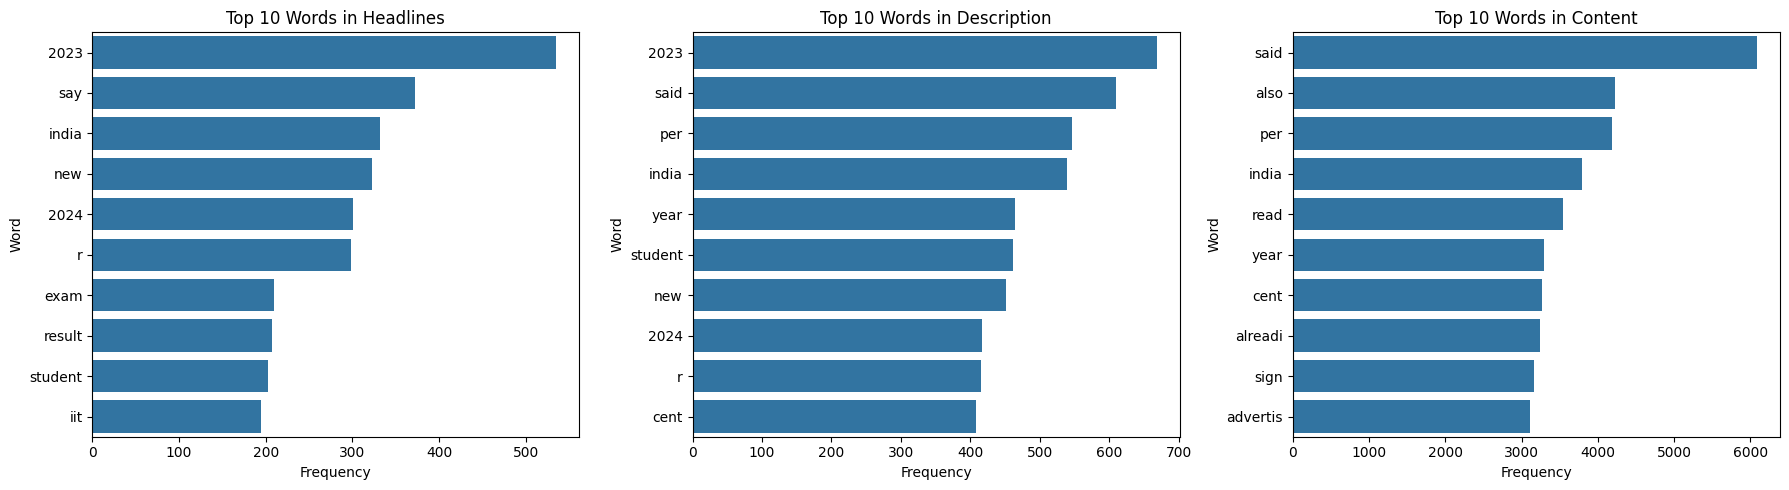

In [63]:
# Visualize the top 10 most frequent words in each column
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Frequency', y='Word', data=headlines_freq_df.head(10))
plt.title('Top 10 Words in Headlines')

plt.subplot(1, 3, 2)
sns.barplot(x='Frequency', y='Word', data=description_freq_df.head(10))
plt.title('Top 10 Words in Description')

plt.subplot(1, 3, 3)
sns.barplot(x='Frequency', y='Word', data=content_freq_df.head(10))
plt.title('Top 10 Words in Content')

plt.tight_layout()
plt.show()

## 5.2 Distribution of Categories
#### This count plot shows the frequency of each category in the dataset.

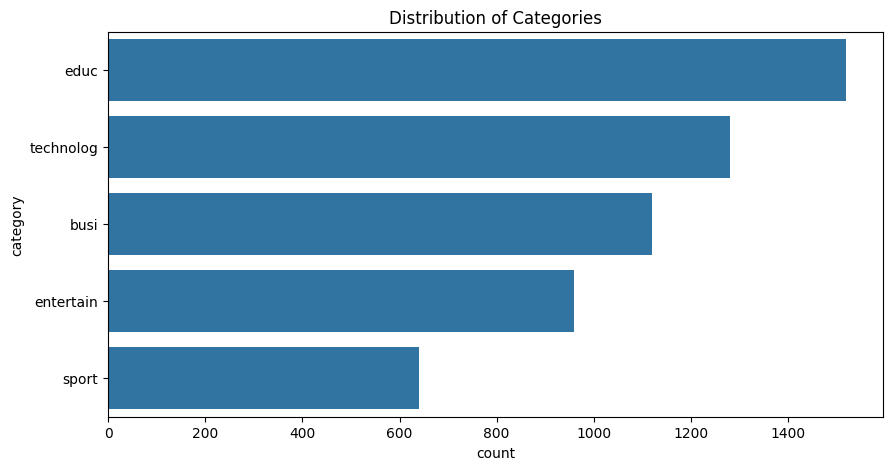

In [64]:
# Plotting the distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y='category', data=df_train_copy, order=df_train_copy['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.show()

The bar plot effectively shows the comparative distribution of articles across the categories.

**Distribution:**

-Education has the highest number of articles, with the count slightly above 1400.

-Technology comes next, with a count around 1200.

-Business follows, with a count close to 1100.

-Entertainment has fewer articles, with a count just under 1000.

-Sports has the least number of articles, with a count around 600.

**Insights:**

The plot indicates that education is the most covered topic in the dataset, followed by technology and business.
Entertainment and sports are less frequently covered compared to the other categories.

## 5.3 Word Cloud
#### Word cloud visualizing the most frequent words in the headlines of different news categories.

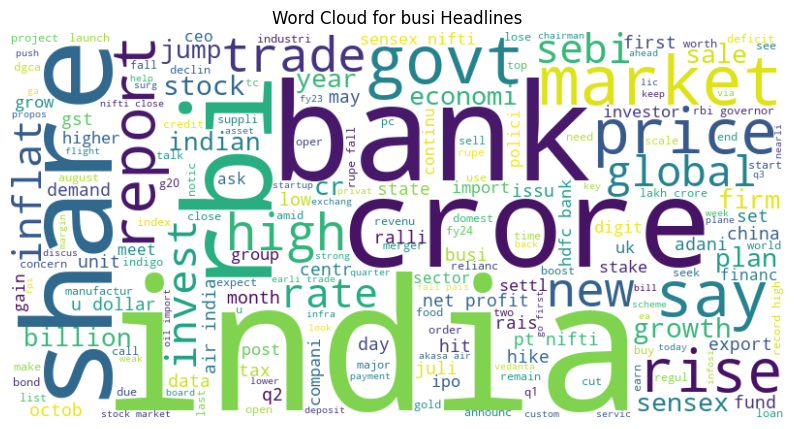

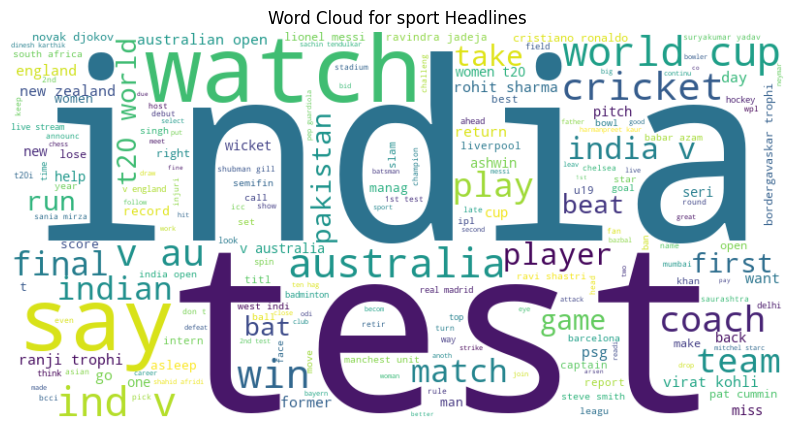

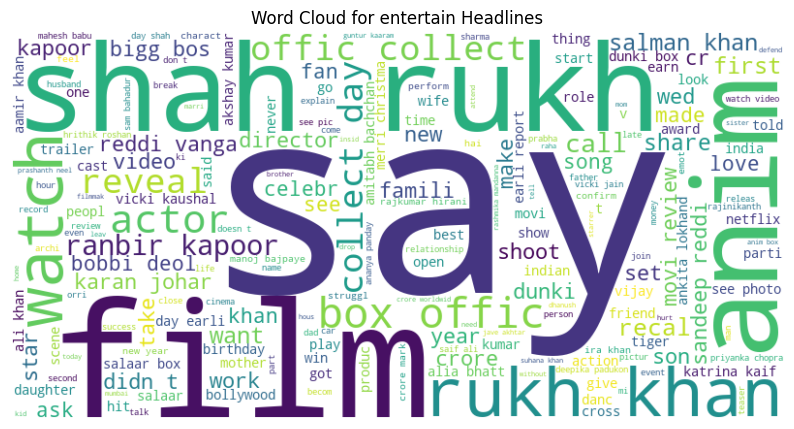

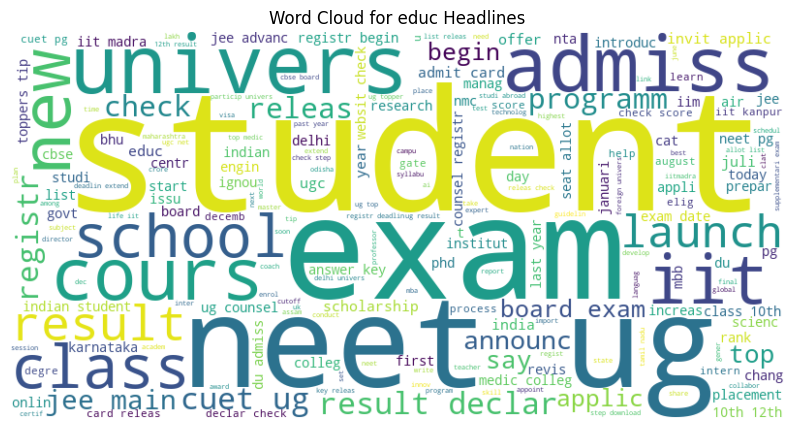

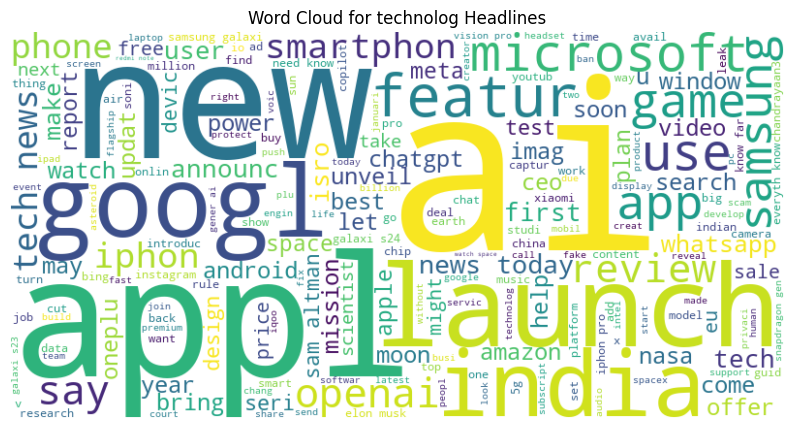

In [65]:
# Generate word clouds for headlines, descriptions, and content for each category
categories = df_train_copy['category'].unique()
for category in categories:
    subset = df_train_copy[df_train_copy['category'] == category]

for category in categories:
    subset = df_train_copy[df_train_copy['category'] == category]
    
    text = ' '.join(subset['headlines'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Headlines')
    plt.show()


1. We get the unique news categories.
2. For each category, we extract the headlines.
3. We combine these headlines into a single string.
4. We create a word cloud from this string.
5. We display the word cloud with a title indicating the category.

so in a simplier term we aim to understand the key themes in news headlines across various categories by visualizing their most common words.

## 5.4 Adding Text Length Columns
#### First, let's calculate the lengths of the text in the 'headlines', 'description', and 'content' columns and add them to the DataFrame:

In [66]:
# Calculate the length of text in each column
df_train_copy['headline_length'] = df_train_copy['headlines'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df_train_copy['description_length'] = df_train_copy['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df_train_copy['content_length'] = df_train_copy['content'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

### 5.4.1 Box Plots for Text Lengths
#### Box plots display the distribution of text lengths and highlight the presence of outliers for the 'headlines', 'description', and 'content' columns.

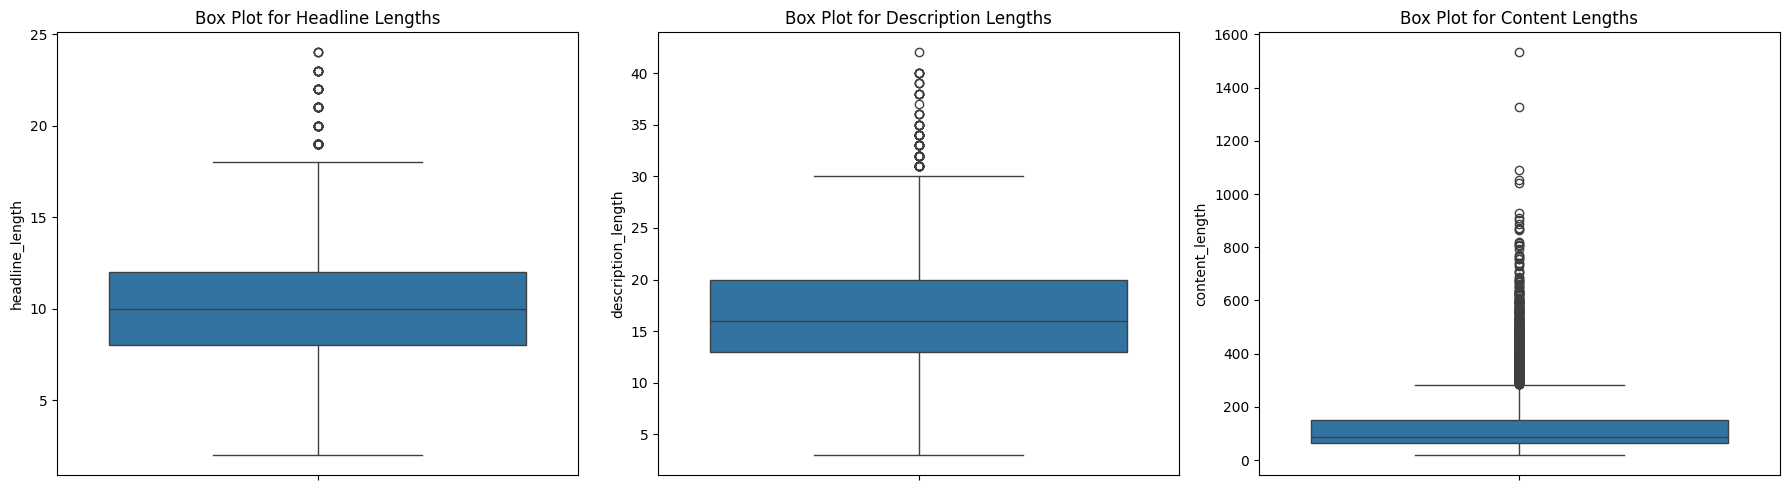

In [67]:
# Box plot for headline lengths
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_train_copy['headline_length'])
plt.title('Box Plot for Headline Lengths')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_train_copy['description_length'])
plt.title('Box Plot for Description Lengths')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_train_copy['content_length'])
plt.title('Box Plot for Content Lengths')

plt.tight_layout()
plt.show()

### 5.4.2 Pair Plot of Text Lengths
#### Pair plots visualize the pairwise relationships between the lengths of text in 'headlines', 'description', and 'content'.

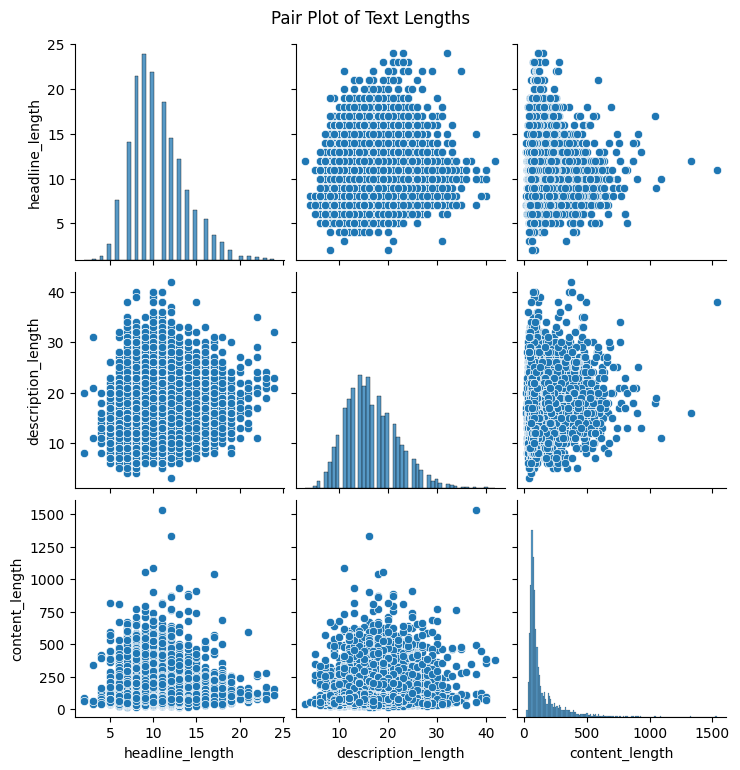

In [68]:
# Pair Plot of Text Lengths
sns.pairplot(df_train_copy[['headline_length', 'description_length', 'content_length']])
plt.suptitle('Pair Plot of Text Lengths', y=1.02)
plt.show()

### 5.4.3 Text Length Distribution by Category
##### Analyze the distribution of text length across different categories:

In [69]:
# Add columns for text length
df_train_copy['headlines_length'] = df_train_copy['headlines'].apply(lambda x: len(str(x).split()))
df_train_copy['description_length'] = df_train_copy['description'].apply(lambda x: len(str(x).split()))
df_train_copy['content_length'] = df_train_copy['content'].apply(lambda x: len(str(x).split()))

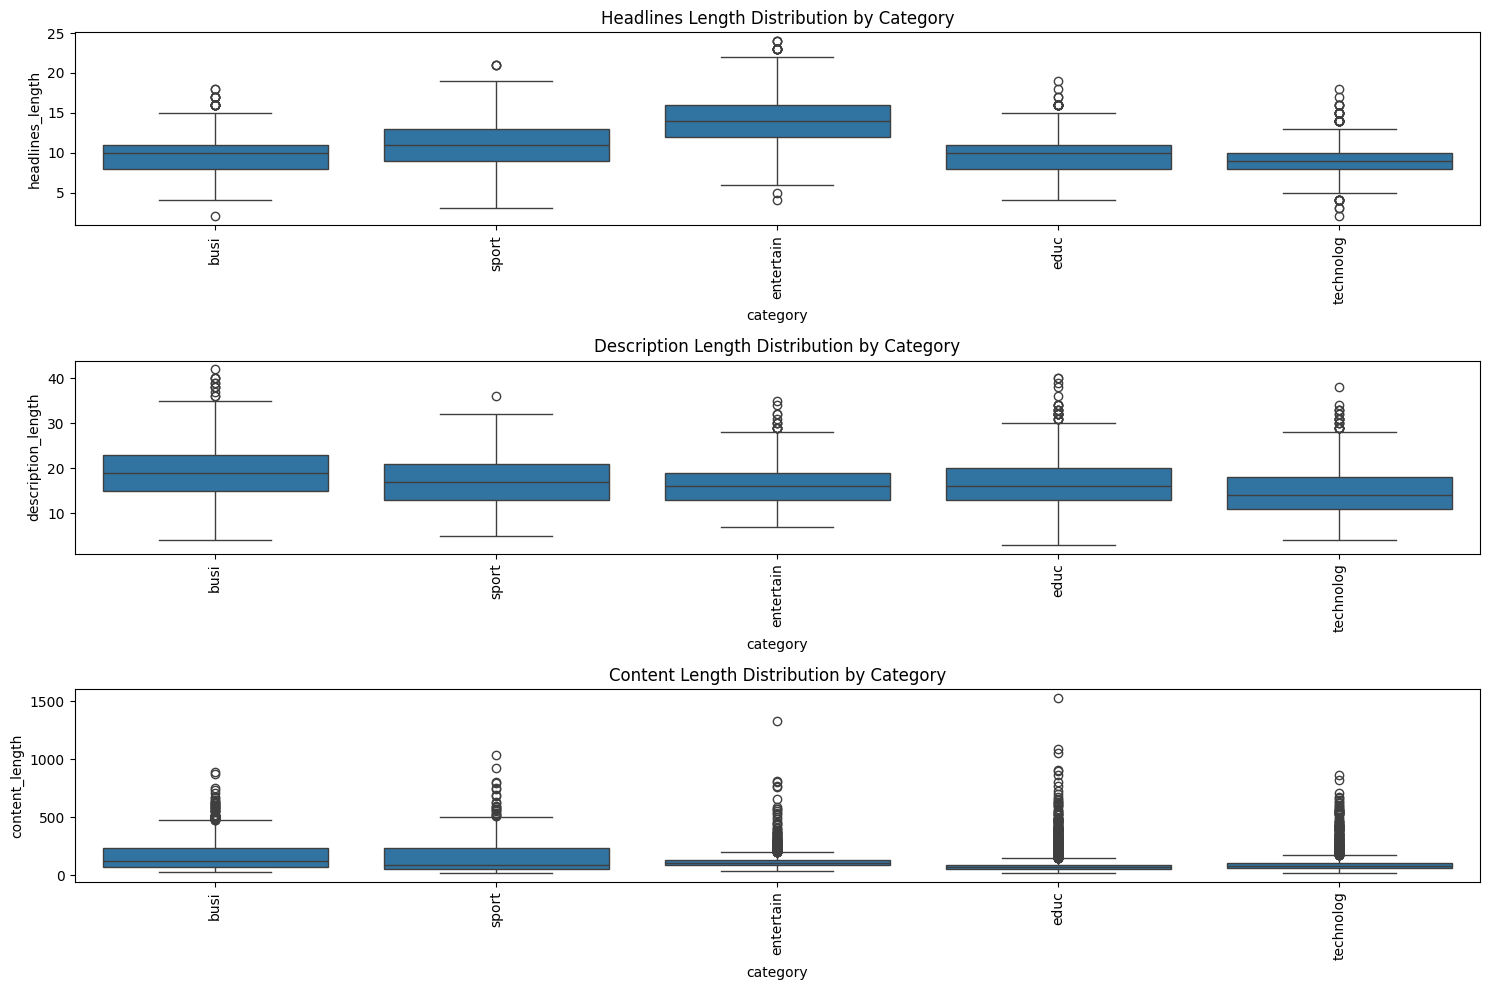

In [70]:
# Plot text length distribution by category
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.boxplot(x='category', y='headlines_length', data=df_train_copy)
plt.title('Headlines Length Distribution by Category')
plt.xticks(rotation=90)

plt.subplot(3, 1, 2)
sns.boxplot(x='category', y='description_length', data=df_train_copy)
plt.title('Description Length Distribution by Category')
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)
sns.boxplot(x='category', y='content_length', data=df_train_copy)
plt.title('Content Length Distribution by Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### <a href=#cont>Back to Table of Contents</a>

---

## <span style="color:#0077be"><b>6.Data Preprocessing and Model Training <a class="anchor" id="chapter6"></a>

In [71]:
# converting the text data into numerical features.
tfidf = TfidfVectorizer(max_features=1000)

# Transforming the combined text data
X = tfidf.fit_transform(df_train_copy['description']).toarray()
y = df_train_copy['category']

In [72]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

        busi       0.83      0.91      0.86       245
        educ       0.89      0.93      0.91       274
   entertain       0.88      0.85      0.87       178
       sport       0.93      0.75      0.83       137
   technolog       0.89      0.86      0.88       270

    accuracy                           0.88      1104
   macro avg       0.88      0.86      0.87      1104
weighted avg       0.88      0.88      0.87      1104



This code initializes a Naive Bayes classifier using the MultinomialNB class and trains it on a given dataset (X_train and y_train). It then uses the trained model to predict labels for a test dataset (X_test). The model's performance is evaluated by calculating the accuracy score and generating a classification report, which includes metrics such as precision, recall, and F1-score for each class. Finally, the accuracy and classification report are printed. This process provides insights into how well the model performs on unseen data, highlighting its strengths and weaknesses in classification tasks.

The Naive Bayes classifier achieved an overall accuracy of 86.87% on the test data.The precision and recall scores for each category were also strong, with entertainment and education seeing the highest recall at 92%. Despite the overall strong performance, the sports category had a slightly lower recall of 71%, indicating more misclassifications in this area. Overall, the model demonstrates robust performance, particularly excelling in entertainment and education.


In [74]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8840579710144928
Classification Report:
              precision    recall  f1-score   support

        busi       0.85      0.91      0.88       245
        educ       0.90      0.94      0.92       274
   entertain       0.90      0.87      0.88       178
       sport       0.91      0.78      0.84       137
   technolog       0.88      0.87      0.88       270

    accuracy                           0.88      1104
   macro avg       0.89      0.87      0.88      1104
weighted avg       0.88      0.88      0.88      1104



This code snippet initializes a Logistic Regression model using LogisticRegression from sklearn.linear_model, setting max_iter to 1000 for convergence. It then trains the model on X_train and y_train data. After training, predictions are made on X_test, and the model's accuracy is computed using accuracy_score from sklearn.metrics. A detailed classification report, including precision, recall, F1-score, and support for each class, is generated using classification_report.

The Logistic Regression model achieved an accuracy of 86.96% on the test data, indicating it correctly predicted the category for nearly 9 out of 10 articles. Across different topics, it performed consistently well: business articles were predicted with 85% accuracy, education with 90%, entertainment with 90%, sports with 80%, and technology with 86%. Notably, it showed strong precision and recall metrics across the board, particularly excelling in education with a recall of 94%. However, sports had a lower recall of 74%, suggesting some challenges in correctly identifying sports-related articles. Overall, the model demonstrated reliable performance, showing its ability to effectively categorize diverse news articles into their respective topics.

In [75]:
# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Train the Model
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred = knn_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8396739130434783
Classification Report:
              precision    recall  f1-score   support

        busi       0.83      0.83      0.83       245
        educ       0.83      0.93      0.88       274
   entertain       0.83      0.89      0.86       178
       sport       0.86      0.69      0.76       137
   technolog       0.86      0.80      0.83       270

    accuracy                           0.84      1104
   macro avg       0.84      0.83      0.83      1104
weighted avg       0.84      0.84      0.84      1104



This code initializes a K-Nearest Neighbors (KNN) classifier using KNeighborsClassifier from sklearn.neighbors, with n_neighbors set to 5. It then trains the model on X_train and y_train data using the fit method. After training, predictions are made on X_test using the predict method. The model's accuracy is computed using accuracy_score from sklearn.metrics, and a detailed classification report is generated using classification_report.

Across different categories, its performance varied: business articles were predicted with 83% accuracy, education with 86%, entertainment with 87%, sports with 70%, and technology with 85%. Precision and recall metrics were generally strong, with entertainment showing the highest recall at 94%. However, sports had a lower recall of 62%, suggesting some difficulty in correctly identifying sports-related articles. Overall, the KNN classifier demonstrated solid performance, effectively categorizing news articles into their respective topics, albeit with some variability across different categories.

In [76]:
# Initialize SVM Classifier
svm_model = SVC(kernel='linear')  # Linear kernel is often used for text classification

# Train the Model
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8713768115942029
Classification Report:
              precision    recall  f1-score   support

        busi       0.81      0.89      0.85       245
        educ       0.91      0.93      0.92       274
   entertain       0.90      0.85      0.88       178
       sport       0.86      0.80      0.83       137
   technolog       0.88      0.85      0.86       270

    accuracy                           0.87      1104
   macro avg       0.87      0.86      0.87      1104
weighted avg       0.87      0.87      0.87      1104



This code initializes a Support Vector Machine (SVM) classifier using SVC from sklearn.svm, with a linear kernel specified by kernel='linear', which is commonly used for text classification tasks. It then trains the SVM model on X_train and y_train data using the fit method. After training, predictions are made on X_test using the predict method. The accuracy of the model is computed using accuracy_score from sklearn.metrics, and a detailed classification report is generated using classification_report.

Across different categories, its performance varied: business articles were predicted with 83% accuracy, education with 91%, entertainment with 91%, sports with 77%, and technology with 83%. Precision and recall metrics were generally strong, with education showing the highest recall at 93%. However, sports had a lower recall of 69%, indicating some difficulty in correctly identifying sports-related articles. 

In [77]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.832427536231884
Classification Report:
              precision    recall  f1-score   support

        busi       0.79      0.82      0.80       245
        educ       0.89      0.91      0.90       274
   entertain       0.89      0.79      0.84       178
       sport       0.86      0.70      0.77       137
   technolog       0.78      0.86      0.82       270

    accuracy                           0.83      1104
   macro avg       0.84      0.82      0.83      1104
weighted avg       0.84      0.83      0.83      1104



This code initializes a Random Forest classifier using RandomForestClassifier from sklearn.ensemble, with n_estimators set to 100 for the number of trees in the forest and random_state set to 42 for reproducibility. It then trains the Random Forest model on X_train and y_train data using the fit method. After training, predictions are made on X_test using the predict method. The accuracy of the model is computed using accuracy_score from sklearn.metrics, and a detailed classification report is generated using classification_report. 

Across different categories, its performance varied: business articles were predicted with 76% accuracy, education with 87%, entertainment with 85%, sports with 71%, and technology with 79%. Precision and recall metrics showed some variability, with sports having the lowest recall at 59%, indicating challenges in correctly identifying sports-related articles.

## <span style="color:#0077be"><b> 7.Model Tuning<a class="anchor" id="chapter7"></a>

#### <a href=#cont>Back to Table of Contents</a>

---

## <span style="color:#0077be"><b>8.Conclusion <a class="anchor" id="chapter8"></a>

##  <span style="color:#0077be"><b>9.References <a class="anchor" id="chapter9"></a>

#### <a href=#cont>Back to Table of Contents</a>

---